In [39]:
# MNIST MLP

In [40]:
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define data transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize tensor with mean and std
])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Download and load the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
flat_data = train_dataset.data.flatten(1)


In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
from sklearn.preprocessing import StandardScaler
standardized_result = StandardScaler().fit_transform(flat_data)
print(standardized_result)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
clf = MLPClassifier(hidden_layer_sizes=(100, ),)
clf.fit(standardized_result, train_dataset.targets)

MLPClassifier()

In [51]:
flat_test_data = test_dataset.data.flatten(1)
test_standardized_result = StandardScaler().fit_transform(flat_test_data)
test_classification = clf.predict(test_standardized_result)

In [52]:
from sklearn.metrics import accuracy_score
# Calculate accuracy score
accuracy = accuracy_score(test_classification, test_dataset.test_labels)
print(accuracy)

0.9763


c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Text(0.5, 0, 'epochs')

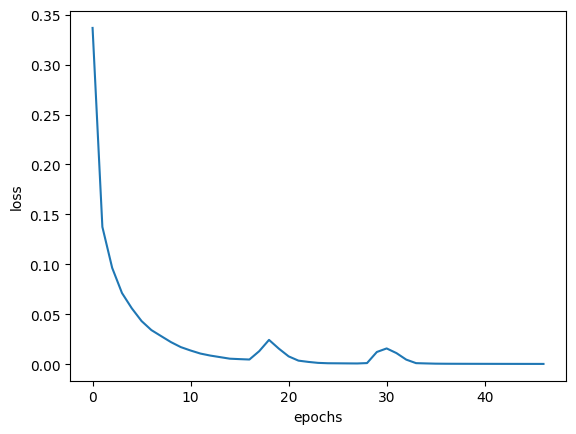

In [59]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline


# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features
#     ('classifier', MLPClassifier())                 # SVM classifier
# ])
# param_grid = {
#     'classifier__hidden_layer_sizes': [(x * 10, ) for x in range(1, 10)],
#     'classifier__max_iter': [100],
# }
# grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# skf = StratifiedKFold(n_splits=5)
# scores = cross_val_score(grid_search, X, y, cv=skf)
# grid_search.fit(X, y)

# print("Cross-validated scores:", scores)
# print("Average cross-validated score:", scores.mean())
# 97.7
import matplotlib.pyplot as plt


plt.plot(clf.loss_curve_)
plt.ylabel("loss")
plt.xlabel("epochs")
print(clf.get_params().batch_size)
# iteracja to iteracja
# Epoka to przejście przez cały zbiór treningowy
# they are not the same

# batch size

In [62]:
clf2 = MLPClassifier(hidden_layer_sizes=(100, ))
clf2.fit(standardized_result, train_dataset.targets)

c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(batch_size=1000)

0.9567


c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Text(0.5, 0, 'epochs')

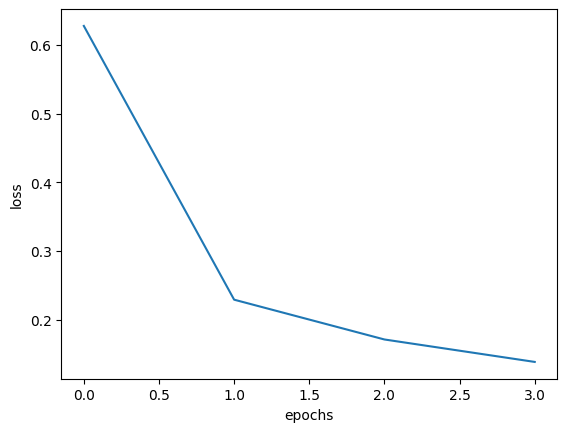

In [63]:
flat_test_data = test_dataset.data.flatten(1)
test_standardized_result = StandardScaler().fit_transform(flat_test_data)
test_classification = clf2.predict(test_standardized_result)
from sklearn.metrics import accuracy_score
# Calculate accuracy score
accuracy = accuracy_score(test_classification, test_dataset.test_labels)
print(accuracy)
import matplotlib.pyplot as plt


plt.plot(clf2.loss_curve_)
plt.ylabel("loss")
plt.xlabel("epochs")

In [66]:
clf.batch_size

'auto'